In [41]:
import pandas as pd

In [42]:
df = pd.read_csv("cleaned_merged_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,fips_block_group,state_name,county_name,tract,block_group,tot_population_cen_2010,hispanic_cen_2010,nh_blk_alone_cen_2010,nh_aian_alone_cen_2010,nh_asian_alone_cen_2010,...,pct_renter_occp_hu_cen_2010,pct_owner_occp_hu_cen_2010,pct_no_plumb_acs_09_13,has_superfund,address,city,latitude,longitude,site_score,site_text
0,10010201001,Alabama,Autauga County,20100.0,1.0,698.0,18.0,78.0,5.0,3.0,...,31.68,68.32,6.80,0.0,0,0,0.0,0.0,0.0,0
1,10010201002,Alabama,Autauga County,20100.0,2.0,1214.0,26.0,139.0,8.0,11.0,...,17.17,82.83,12.44,0.0,0,0,0.0,0.0,0.0,0
2,10010202001,Alabama,Autauga County,20200.0,1.0,1003.0,31.0,625.0,4.0,4.0,...,35.48,64.52,4.57,0.0,0,0,0.0,0.0,0.0,0
3,10010202002,Alabama,Autauga County,20200.0,2.0,1167.0,44.0,589.0,1.0,1.0,...,38.06,61.94,6.64,0.0,0,0,0.0,0.0,0.0,0
4,10010203001,Alabama,Autauga County,20300.0,1.0,2549.0,69.0,477.0,7.0,9.0,...,16.94,83.06,2.10,0.0,0,0,0.0,0.0,0.0,0


In [43]:
selected_features = df.loc[:, df.columns != 'has_superfund']
selected_features.head()

,fips_block_group,state_name,county_name,tract,block_group,tot_population_cen_2010,hispanic_cen_2010,nh_blk_alone_cen_2010,nh_aian_alone_cen_2010,nh_asian_alone_cen_2010,...,pct_vacant_units_cen_2010,pct_renter_occp_hu_cen_2010,pct_owner_occp_hu_cen_2010,pct_no_plumb_acs_09_13,address,city,latitude,longitude,site_score,site_text
0,10010201001,Alabama,Autauga County,20100.0,1.0,698.0,18.0,78.0,5.0,3.0,...,7.42,31.68,68.32,6.80,0,0,0.0,0.0,0.0,0
1,10010201002,Alabama,Autauga County,20100.0,2.0,1214.0,26.0,139.0,8.0,11.0,...,8.10,17.17,82.83,12.44,0,0,0.0,0.0,0.0,0
2,10010202001,Alabama,Autauga County,20200.0,1.0,1003.0,31.0,625.0,4.0,4.0,...,9.07,35.48,64.52,4.57,0,0,0.0,0.0,0.0,0
3,10010202002,Alabama,Autauga County,20200.0,2.0,1167.0,44.0,589.0,1.0,1.0,...,10.07,38.06,61.94,6.64,0,0,0.0,0.0,0.0,0
4,10010203001,Alabama,Autauga County,20300.0,1.0,2549.0,69.0,477.0,7.0,9.0,...,4.98,16.94,83.06,2.10,0,0,0.0,0.0,0.0,0


In [44]:
selected_features = selected_features.loc[:, selected_features.columns != 'latitude'] 

In [45]:
selected_features = selected_features.loc[:, selected_features.columns != 'longitude'] 

In [46]:
selected_features = selected_features.loc[:, selected_features.columns != 'fips_full'] 

In [47]:
selected_features = selected_features.loc[:, selected_features.columns != 'site_Score'] 

In [48]:
selected_features = selected_features.loc[:, selected_features.columns != 'fips_block_group']

In [49]:
cols_to_remove = []

for col in selected_features.columns:
    try:
        _ = selected_features[col].astype(float)
    except ValueError:
        print('Couldn\'t covert %s to float' % col)
        cols_to_remove.append(col)
        pass

# keep only the columns in df that do not contain string
selected_features = selected_features[[col for col in selected_features.columns if col not in cols_to_remove]]

Couldn't covert state_name to float
Couldn't covert county_name to float
Couldn't covert address to float
Couldn't covert city to float
Couldn't covert site_text to float


In [50]:
X = selected_features
y = df[['has_superfund']]

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [62]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
coef = model.coef_[0]
col_names = X.columns
feat_lst = list(zip(col_names, coef))
summary_df = pd.DataFrame({'feature_name': col_names, 'correl': coef})
summary_df.sort_values(['correl'], ascending=False)

,feature_name,correl
30,site_score,4.715409e-05
12,aggregate_hh_inc_acs_09_13,4.285062e-08
22,pct_nh_nhopi_alone_cen_2010,-2.700102e-07
23,pct_nh_sor_alone_cen_2010,-3.259399e-07
20,pct_nh_aian_alone_cen_2010,-8.283358e-07
0,tract,-1.667851e-06
7,nh_nhopi_alone_cen_2010,-2.015160e-06
9,college_acs_09_13,-2.263011e-06
17,med_house_value_bg_acs_09_13,-2.762896e-06
21,pct_nh_asian_alone_cen_2010,-3.704114e-06


In [53]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.9937515878104547
Testing Data Score: 0.9940480510996589


In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              }
grid = GridSearchCV(model, param_grid, verbose=2)

In [55]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............................................. C=1, total=   1.0s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............................................. C=1, total=   1.0s
[CV] C=1 .............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............................................. C=1, total=   0.7s
[CV] C=1 .............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............................................. C=1, total=   1.1s
[CV] C=1 .............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............................................. C=1, total=   1.1s
[CV] C=5 .............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............................................. C=5, total=   1.0s
[CV] C=5 .............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............................................. C=5, total=   1.1s
[CV] C=5 .............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............................................. C=5, total=   0.8s
[CV] C=5 .............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............................................. C=5, total=   2.1s
[CV] C=5 .............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............................................. C=5, total=   1.8s
[CV] C=10 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................................. C=10, total=   1.1s
[CV] C=10 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................................. C=10, total=   1.3s
[CV] C=10 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................................. C=10, total=   0.8s
[CV] C=10 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................................. C=10, total=   1.4s
[CV] C=10 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................................. C=10, total=   1.1s
[CV] C=50 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................................. C=50, total=   1.8s
[CV] C=50 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................................. C=50, total=   1.0s
[CV] C=50 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................................. C=50, total=   0.8s
[CV] C=50 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................................. C=50, total=   0.9s
[CV] C=50 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................................. C=50, total=   1.0s


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   23.0s finished
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [1, 5, 10, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [56]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1}
0.9937757832721322


In [57]:
from sklearn.metrics import classification_report
predictions = grid.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     54782
         1.0       0.00      0.00      0.00       326

    accuracy                           0.99     55108
   macro avg       0.50      0.50      0.50     55108
weighted avg       0.99      0.99      0.99     55108



In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [59]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9210395077188254
Testing Score: 0.9374114005640006


Text(0.5, 1.0, 'Residual Plot')

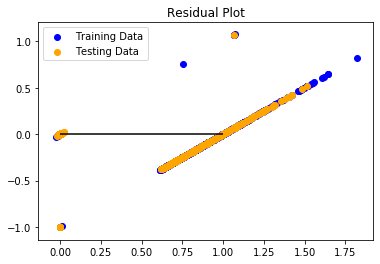

In [60]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [61]:
coef = model.coef_[0]
col_names = X.columns
feat_lst = list(zip(col_names, coef))
summary_df = pd.DataFrame({'feature_name': col_names, 'correl': coef})
summary_df.sort_values(['correl'], ascending=False)

,feature_name,correl
30,site_score,2.140927e-02
23,pct_nh_sor_alone_cen_2010,1.062654e-03
28,pct_owner_occp_hu_cen_2010,5.470176e-05
27,pct_renter_occp_hu_cen_2010,4.528212e-05
25,pct_no_health_ins_acs_09_13,2.882902e-05
21,pct_nh_asian_alone_cen_2010,1.567297e-05
7,nh_nhopi_alone_cen_2010,4.142373e-06
26,pct_vacant_units_cen_2010,4.042299e-06
1,block_group,3.606638e-06
24,pct_not_hs_grad_acs_09_13,2.695739e-06
